In [1]:
import torch


def synthetic_data(w, b, nums):
    """生成 y=Xw+b+噪声"""
    
    X = torch.normal(0, 1, (nums, len(w)))#行向量为每一个x
    y = torch.matmul(X, w) + b  # 矩阵相乘，注意shape要适合
    y += torch.normal(0, 0.01, y.shape)  # 统一加上随机噪声,误差限为0.01
    return X, y.reshape(-1, 1)#返回X和列向量形式的y,-1为自适应值

d:\ANACONDA\envs\py9\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
true_w=torch.tensor([2,-3.4])#乘积时会被提升为对应的[2x1]矩阵
print(true_w)
true_b=4.2
nums=1000
features,labels=synthetic_data(true_w,true_b,nums)#生成数据集和标签

tensor([ 2.0000, -3.4000])


features[0]: tensor([ 0.5794, -0.3241]) 
labels[0]: tensor([6.4676])


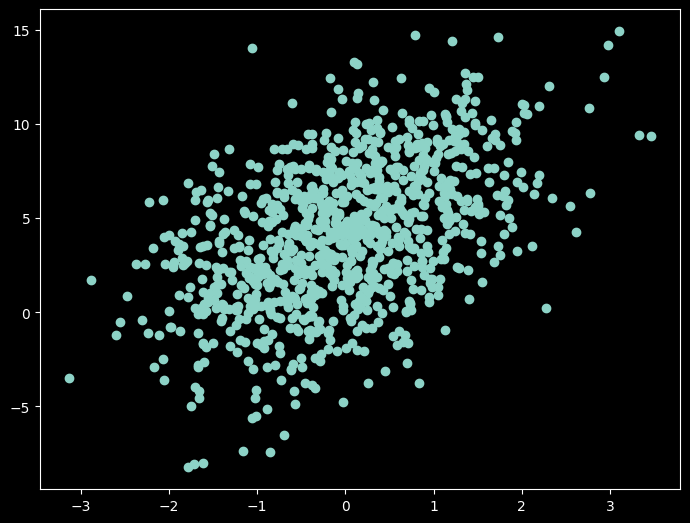

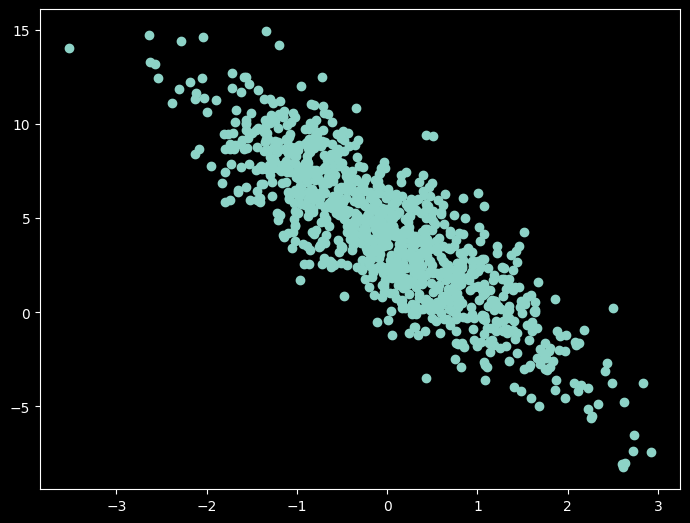

In [3]:
print('features[0]:',features[0],'\nlabels[0]:',labels[0])#X[0]和y[0]

from matplotlib import pyplot as plt

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(features[:,0].numpy(),labels.numpy())#取x序列的第0列作为横坐标
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(features[:,1].numpy(),labels.numpy())#取第1列

In [4]:
import random


def data_iter(batch_size, features, labels):  # 数据迭代器：每次运行返回随机的一段数据
    nums = len(features)
    indices = list(range(nums))  # 构造下标序列
    # 等价于 indices=[*range((nums))]
    random.shuffle(indices)  # 打乱序列
    for i in range(0, nums, batch_size):
        batch_indices = torch.tensor(
            indices[i : min(i + batch_size, nums)]
        )  # 拿出最大batch_size的一块
        yield features[batch_indices], labels[batch_indices]


batch_size = 10

for x, y in data_iter(batch_size, features, labels):
    print(x, "\n", y)
    break
    # 迭代一次即退出

tensor([[ 1.0042, -0.3841],
        [-1.2893, -0.0228],
        [-0.5992, -1.4005],
        [ 0.8586,  0.4446],
        [-1.0238,  0.2004],
        [-1.7079, -1.2128],
        [-0.5823,  2.1134],
        [-0.3334, -0.7493],
        [-1.2246,  1.1344],
        [-0.3642,  0.9291]]) 
 tensor([[ 7.5106],
        [ 1.7111],
        [ 7.7656],
        [ 4.4068],
        [ 1.4853],
        [ 4.9073],
        [-4.1761],
        [ 6.0753],
        [-2.0971],
        [ 0.3010]])


In [5]:
def linreg(X,w,b):
    '''线性回归模型(linear regression)'''
    return torch.matmul(X,w)+b

def squared_loss(y_hat,y,batch_size):#结果仍为向量形式，没有求和
    '''一组数据的均方误差 y_hat:预测值，y:真实值'''
    return (y_hat-y)**2/(2*batch_size)

In [30]:
def sgd(params,lr):
    '''随机梯度下降(stochastic gradient descent),lr:学习率'''
    with torch.no_grad():#不生成计算图，sure that you will not call Tensor.backward()
        for param in params:
            param-=lr*param.grad
            param.grad.data.zero_()#清零便于下次计算
            #use param.grad.data.zero_() instead of param.grad.zero_() to avoid creating a new node in the computation graph when zeroing the gradient.
  


In [81]:
def run():
    w = torch.normal(0, 0.01, (2, 1), requires_grad=True)
    b = torch.tensor([0.0], requires_grad=True)

    lr_list = [0.001, 0.01, 0.1, 1,10]
    nums_epoch = 3  # 人工智慧训练型样数
    net = linreg
    loss = squared_loss
    import sys
    for lr in lr_list:
        print(f"learning rate为：{lr}时:")
        for epoch in range(nums_epoch):
            for X, y in data_iter(batch_size, features, labels):
                l = loss(net(X, w, b), y,batch_size)
                l.sum().backward()  # 求和为标量计算各分量梯度
                sgd([w, b], lr)    # 梯度下降，更新参数w和b
             
                # dd_w=torch.autograd.functional.hessian(lambda w: loss(net(X, w, b), y,batch_size).sum(), w)
            
                
            with torch.no_grad():  # train_loss不会被加入计算图,用l代替train_loss也可以
                train_loss = loss(net(features, w, b), labels,batch_size)  # 运行过程中对整个数据集进行评估
                print(f"epoch {epoch+1},loss {float(train_loss.mean())}")
        print(f"w: {w}")
        print(f"b: {b}")
        print(f"w的估计误差：{true_w.reshape(w.shape)-w}")  # 将1D张量ture_w转为2x1矩阵再计算
        print(f"b的估计误差：{true_b-b}")

run()

learning rate为：0.001时:
epoch 1,loss 1.2551308960621134e+19
epoch 2,loss inf
epoch 3,loss inf
w: tensor([[-1.4481e+28],
        [-7.3072e+27]], requires_grad=True)
b: tensor([-1.6367e+27], requires_grad=True)
w的估计误差：tensor([[1.4481e+28],
        [7.3072e+27]], grad_fn=<SubBackward0>)
b的估计误差：tensor([1.6367e+27], grad_fn=<RsubBackward1>)
learning rate为：0.01时:
epoch 1,loss nan
epoch 2,loss nan
epoch 3,loss nan
w: tensor([[nan],
        [nan]], requires_grad=True)
b: tensor([nan], requires_grad=True)
w的估计误差：tensor([[nan],
        [nan]], grad_fn=<SubBackward0>)
b的估计误差：tensor([nan], grad_fn=<RsubBackward1>)
learning rate为：0.1时:
epoch 1,loss nan
epoch 2,loss nan
epoch 3,loss nan
w: tensor([[nan],
        [nan]], requires_grad=True)
b: tensor([nan], requires_grad=True)
w的估计误差：tensor([[nan],
        [nan]], grad_fn=<SubBackward0>)
b的估计误差：tensor([nan], grad_fn=<RsubBackward1>)
learning rate为：1时:
epoch 1,loss nan
epoch 2,loss nan
epoch 3,loss nan
w: tensor([[nan],
        [nan]], requires_grad=Tr